# Homework 1 - KNN
## CSCI 5622 - Spring 2019

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But 1) I'll know that you know what's really going on, and 2) you'll know you can do it, because 2a) someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...), or maybe because you're working on something important and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But, for now, let's set up a KNNClassifier class.

In [90]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict({1:0,-1:0})
        from itertools import groupby
        q=np.array(self._y)
        q.sort()
        for key,group in groupby(q):
            counts[key]=len(list(group))
            
        #print(counts)
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        #END Workspace 1.1
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        assert len(indices)== self._k
        labellist={}
        for index in indices:
            index=self._y[index]
            if index in labellist.keys():
                labellist[index]=labellist[index]+1
            else:
                labellist[index]=1
                
        max=0;
        
        for key in labellist.keys():
            if labellist[key]>max:
                max=labellist[key]
                
        labelCount=[]
        
        for key in labellist.keys():
            if labellist[key]==max:
                labelCount.append(key)
        label=labelCount[0]

        if len(labelCount)>1:
            for i in labelCount:
                if self._counts[label]<self._counts[i]:
                    label=i
                    
        #print(label)
            #BEGIN Workspace 1.2
        #TODO: Determine majority, assign it to label
        #END Workspace 1.2
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k into the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        
        #BEGIN Workspace 1.3
        #TODO: perform classification of point here
        #HINT: use the majority function created above
        #HINT: use the euclidian distance discussed in lecture to find nearest neighbors
        #END Workspace 1.3
        ans = 0
        ans=self._model.query(point.reshape(1,-1),self._k,return_distance=False)
        ans=ans.flatten()
        return self.majority(ans)
        
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        C = np.zeros((10,10),dtype=int)
        for xx,yy in zip(testX,testY):
            column=self.classify(xx)
            C[yy][column]+=1
            
        #print(C)
        return(C)
        
        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        #END Workspace 1.4
        
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        #print(score)
        return(score)

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points (10 each)

1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification

You can take a look at the unit tests below to see how we create data to input into our classifier, what kinds of things we expect as output, etc. You should also consider expanding the test cases to make sure your classifier is working correctly.


In [91]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([1, -1, -1, 1, -1, 1, -1])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        testcase=self.knnfive.confusionMatrix(self.x, self.y)
        self.knnthree.confusionMatrix(self.x, self.y)
        self.testcase2=self.knnone.confusionMatrix(self.x,self.y)
        self.knnone.accuracy(self.testcase2)
        self.testcase3=self.knnone.getCounts()
        print(self.testcase3)
        
        
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
        
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
        #BEGIN Workspace
        #Add more tests as needed
        #END Workspace
        
    def testKNNThree(self):
        self.assertEqual(self.knnthree.classify(self.testPoints[0]), -1)
        
    def testKNNFive(self):
        
        self.assertEqual(self.knnfive.classify(self.testPoints[0]), -1)
    
    #BEGIN Workspace
    #Add more test functions as requested
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....

{1: 3, -1: 4}
{1: 3, -1: 4}
{1: 3, -1: 4}
{1: 3, -1: 4}



----------------------------------------------------------------------
Ran 4 tests in 0.020s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [92]:
from sklearn.model_selection import train_test_split
class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 2.1
        self.train_x = np.array(digits.data) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(digits.target) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(digits.data) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(digits.target) # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        #END Workspace 2.1
        self.train_x,self.test_x,self.train_y,self.test_y=train_test_split(np.array(digits.data),np.array(digits.target),random_state=42,train_size=0.8)
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        #END Workspace 2.2
        print("\nsize of training set data:",self.train_x.size)
        print("\nsize of training set labels:",self.train_y.size)
        print("\nsize of testing set data:",self.test_x.size)
        print("\nsize of testing set labels:",self.test_y.size)
        print("\nno of pixels/size of data points:",len(np.array(self.train_x[0])))
        print("\nshape of training data:",self.train_x.shape)
        print("\nshape of training labels:",self.train_y.shape)
        print("\nshape of testing data:",self.test_x.shape)
        print("\nshape of testing labels:",self.test_y.shape)
        
        

    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion matrix for test data
        #END Workspace 2.3
        self.classifier1=KNNClassifier(self.train_x,self.train_y)
        self.classifier6=self.classifier1.getCounts()
        print("\nCounts of each class\n",self.classifier6)
        self.classifier2=self.classifier1.confusionMatrix(self.test_x,self.test_y)
        
        print("\n Accuracy is",self.classifier1.accuracy(self.classifier2))
        print("\nThe confusion matrix for the classification is ",self.classifier2)
        
    def viewDigit(self, digitImage, label):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        if label is not None: 
            print('\ntrue label: {:d}'.format(label))
            plt.imshow(digitImage.reshape(8, 8), cmap='gray')
#         plt.show()
        
        


size of training set data: 91968

size of training set labels: 1437

size of testing set data: 23040

size of testing set labels: 360

no of pixels/size of data points: 64

shape of training data: (1437, 64)

shape of training labels: (1437,)

shape of testing data: (360, 64)

shape of testing labels: (360,)

Counts of each class
 {1: 154, -1: 0, 0: 145, 2: 144, 3: 149, 4: 135, 5: 135, 6: 146, 7: 145, 8: 144, 9: 140}

 Accuracy is 0.9861111111111112

The confusion matrix for the classification is  [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]

true label: 6


/Users/vandanasridhar/Documents/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


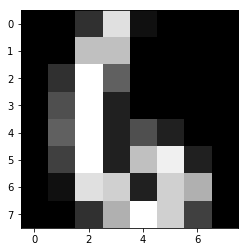

In [93]:
testobj=Numbers()
testobj.report()
testobj.classify()
testobj.viewDigit(testobj.train_x[0], testobj.train_y[0])

*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.


 problem class image

true label: 5

true label: 7

true label: 9

true label: 9

true label: 5

misclassified labels for the above true label respectively:

	 9

	 9

	 4

	 5

	 6


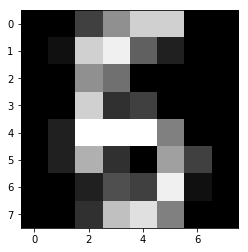

In [94]:
#BEGIN 3.1a
#TODO: Print out problem class images
print("\n problem class image")
classifier3 = KNNClassifier(testobj.train_x,testobj.train_y)
misclassified_images = []
def printimages(testX, testY):
    for xx,yy in zip(testX,testY):
            column=classifier3.classify(xx)
            if yy != column:
                testobj.viewDigit(xx,yy)
                misclassified_images.append((xx,yy,column))
               
                

                

printimages(testobj.test_x, testobj.test_y)
print("\nmisclassified labels for the above true label respectively:")
print("\n\t",misclassified_images[0][2])
print("\n\t",misclassified_images[1][2])
print("\n\t",misclassified_images[2][2])
print("\n\t",misclassified_images[3][2])
print("\n\t",misclassified_images[4][2])


#END 3.1a

#### 3.1b
TODO: Write description of misclassification
> Some classes that misclassified are 5,7 and 9.<br/>
>5 is misclassified as 9 & 6. <br/>
>7 is misclassified as 9. <br/>
>9 is misclassified as 4 & 5.<br/>
>In one instance, the class 9 is misclassified as 4 since they look similar while writing and many people write 9 without extending it's bottom tip. Hence the algorithm finds it difficult to detect 9 without the extended tip and classifies it as 4 instead. </br>

>Another example of misclassification is of class 5 where it is wrongly detected as 6. Owing to human error, 5's rounded tip is extended, as a result of which it looks like 6.


In [95]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 3.3a
        
        self.train_x = np.array(digits.data) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(digits.target) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(digits.data) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(digits.target) # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        #END Workspace 3.3a
        
        self.train_x,self.test_x,self.train_y,self.test_y=train_test_split(np.array(digits.data),np.array(digits.target),random_state=42,test_size=trainPercentage*0.2)


        

    def classify(self, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 3.2a
        #TODO: Create classifier from training data (using k nearest neighbors), generate confusion matrix for test data
        #HINT: You can copy your own work from the original Numbers class
        #END Workspace 3.2a
        
        self.classifier1=KNNClassifier(self.train_x,self.train_y)
        self.classifier2=self.classifier1.confusionMatrix(self.test_x,self.test_y)
        self.accuracylist=self.classifier1.accuracy(self.classifier2)
          
        def viewDigit(digitImage):
            """
            Display an image of a digit
            PARAMETERS
            digitImage - a data object from the dataset
            """
            plt.gray()
            plt.matshow(digitImage)
            plt.show()

In [96]:
'''plotting function'''
def plot(dict,Xlabel,Ylabel):
    lists=sorted(dict.items())
    x,y=zip(*lists)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.plot(x,y)
    plt.show()
    print(dict)
    

Function for comparing several train/test splits and their corresponding accuracies



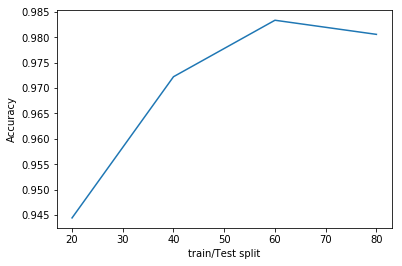

{80: 0.9805555555555555, 60: 0.9833333333333333, 40: 0.9722222222222222, 20: 0.9444444444444444}


In [97]:
'''function for comparing several train/test splits and their corresponding accuracies '''

def accuracy_split(X,y):
    dict={}
    for increment in range(1,5):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=increment*0.2)
        classifier4=KNNClassifier(X_train,y_train)
        #print("classification\t"+str(increment))
        confmatrix=classifier4.confusionMatrix(testobj.test_x,testobj.test_y)
        dict[100- increment * 20]=classifier4.accuracy(np.asarray(confmatrix))
    Xlabel="train/Test split"
    Ylabel="Accuracy"
    plot(dict,Xlabel,Ylabel)
    
print("Function for comparing several train/test splits and their corresponding accuracies\n")    
accuracy_split(testobj.train_x,testobj.train_y)
        
        
        
        
        
        



Function for comparing several values of neighbors i.e K and their corresponding accuracies



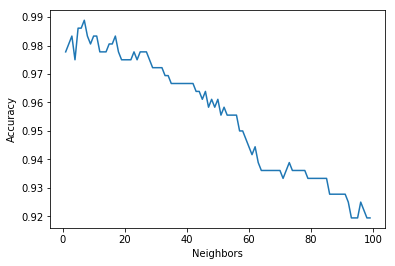

{1: 0.9777777777777777, 2: 0.9805555555555555, 3: 0.9833333333333333, 4: 0.975, 5: 0.9861111111111112, 6: 0.9861111111111112, 7: 0.9888888888888889, 8: 0.9833333333333333, 9: 0.9805555555555555, 10: 0.9833333333333333, 11: 0.9833333333333333, 12: 0.9777777777777777, 13: 0.9777777777777777, 14: 0.9777777777777777, 15: 0.9805555555555555, 16: 0.9805555555555555, 17: 0.9833333333333333, 18: 0.9777777777777777, 19: 0.975, 20: 0.975, 21: 0.975, 22: 0.975, 23: 0.9777777777777777, 24: 0.975, 25: 0.9777777777777777, 26: 0.9777777777777777, 27: 0.9777777777777777, 28: 0.975, 29: 0.9722222222222222, 30: 0.9722222222222222, 31: 0.9722222222222222, 32: 0.9722222222222222, 33: 0.9694444444444444, 34: 0.9694444444444444, 35: 0.9666666666666667, 36: 0.9666666666666667, 37: 0.9666666666666667, 38: 0.9666666666666667, 39: 0.9666666666666667, 40: 0.9666666666666667, 41: 0.9666666666666667, 42: 0.9666666666666667, 43: 0.9638888888888889, 44: 0.9638888888888889, 45: 0.9611111111111111, 46: 0.9638888888888

In [98]:
'''function for comparing several values of neighbors i.e K and their corresponding accuracies '''

def accuracy_neighbors(X,y):
    dict={}
    for increment in range(1,100):
        classifier5=KNNClassifier(X,y,increment)
        #print("classification\t"+str(increment))
        confmatrix=classifier5.confusionMatrix(testobj.test_x,testobj.test_y)
        dict[increment]=classifier5.accuracy(np.asarray(confmatrix))
        
    Xlabel="Neighbors"
    Ylabel="Accuracy"
    plot(dict,Xlabel,Ylabel)
    

print("Function for comparing several values of neighbors i.e K and their corresponding accuracies\n")
accuracy_neighbors(testobj.train_x,testobj.train_y)
    
        
    


#### 3.2b
TODO: Write description of influence of neighbor count

>From the above graph, as the value of K increases, the accuracy drops. Larger values of K underfits  and smoothens the boundary of the model as majority of the instances belong to the same class. 


#### 3.3b
TODO: Write description of influence of training / testing split

>From the above graph , as the number of training instances ie training data increases,accuracy also increases. Hence adding more training data to the model improves it's ability to classify instances.
    
